In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [3]:
import yfinance as yf

# Define the ticker symbol and date range
ticker_symbol = 'AAPL'
start_date = '2014-01-01'
end_date = '2024-01-01'

# Download historical data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318727,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938311,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030678,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908875,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318727,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938311,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030678,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908875,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [7]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600


In [8]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


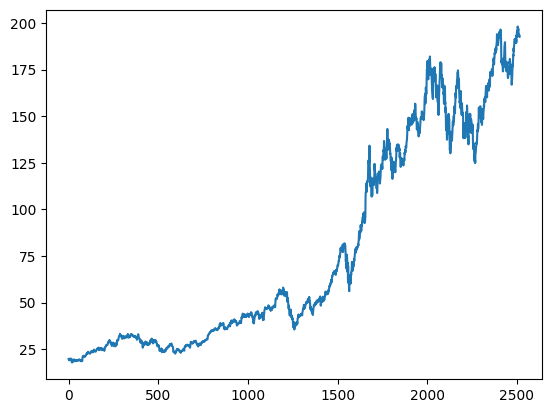

In [9]:
plt.plot(df.Close)

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    181.768301
2512    181.787101
2513    181.898701
2514    182.046001
2515    182.173301
Name: Close, Length: 2516, dtype: float64

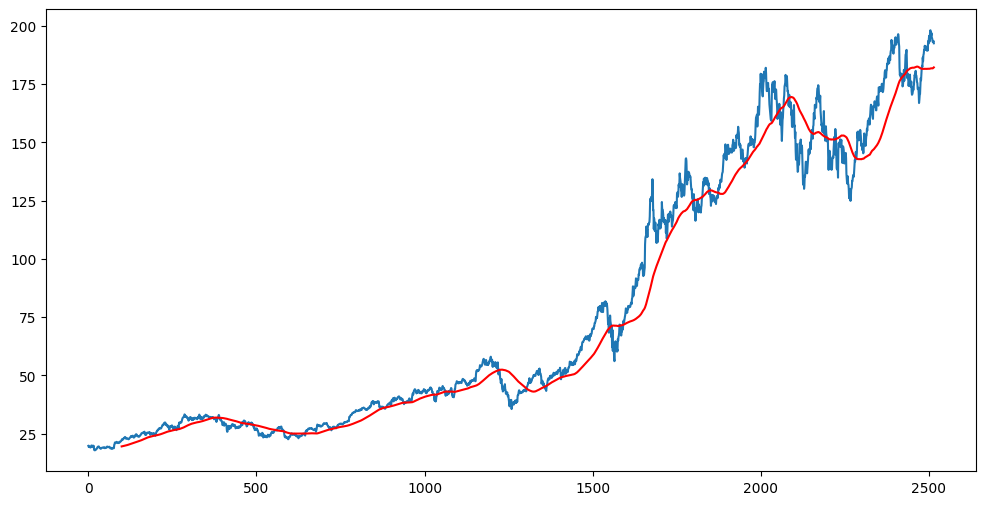

In [11]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    178.649100
2512    178.871851
2513    179.085250
2514    179.290201
2515    179.487900
Name: Close, Length: 2516, dtype: float64

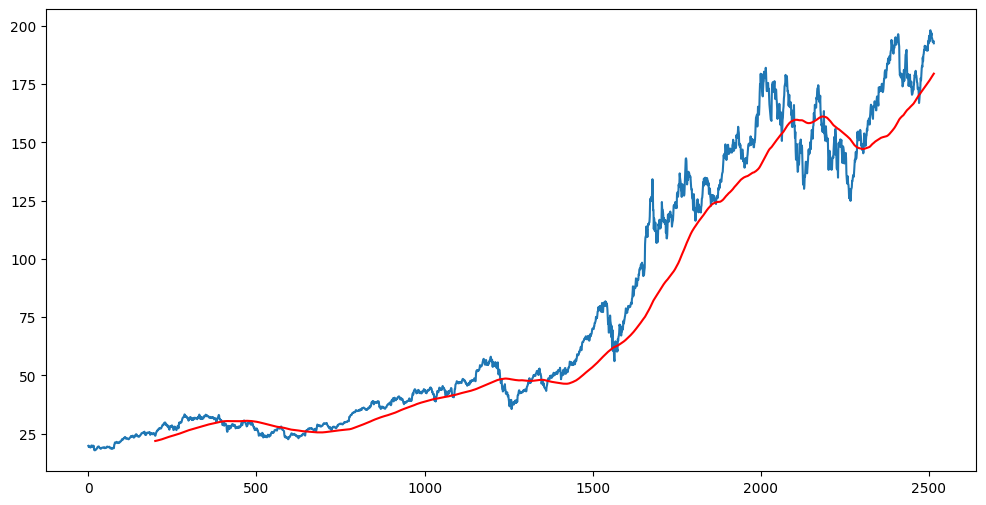

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma200, 'r')

In [14]:
df.shape

(2516, 5)

In [15]:
#Splitting data into training and test dataset

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [16]:
data_training.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [17]:
data_testing.head()

,Close
1761,133.720001
1762,132.690002
1763,129.410004
1764,131.009995
1765,126.599998


In [18]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scalar.fit_transform(data_training)
data_training_array

array([[0.01603287],
       [0.01238153],
       [0.01326806],
       ...,
       [0.96028296],
       [1.        ],
       [0.98468532]])

In [20]:
data_training_array.shape

(1761, 1)

In [21]:
x_train = []
y_train = [] #empty lists

for i in range(100, data_training.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) #converted to array

In [22]:
y_train.shape

(1661,)

In [23]:
#ML Model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [43]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1))) #working only with close cloumn as of now so 1
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) #working only with close cloumn as of now so 1
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) #working only with close cloumn as of now so 1
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')) #working only with close cloumn as of now so 1
model.add(Dropout(0.5))

model.add(Dense(units = 1))







In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [45]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 21s 300ms/step - loss: 0.0254
Epoch 2/50
52/52 [==============================] - 16s 299ms/step - loss: 0.0062
Epoch 3/50
52/52 [==============================] - 17s 322ms/step - loss: 0.0046
Epoch 4/50
52/52 [==============================] - 16s 303ms/step - loss: 0.0040
Epoch 5/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0040
Epoch 6/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0034
Epoch 7/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0037
Epoch 8/50
52/52 [==============================] - 16s 301ms/step - loss: 0.0031
Epoch 9/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0029
Epoch 10/50
52/52 [==============================] - 17s 323ms/step - loss: 0.0027
Epoch 11/50
52/52 [==============================] - 16s 305ms/step - loss: 0.0030
Epoch 12/50
52/52 [==============================] - 16s 303ms/step - loss: 0.0024
Epoch 13/50
5

In [28]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
data_testing.head()

,Close
1761,133.720001
1762,132.690002
1763,129.410004
1764,131.009995
1765,126.599998


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-31-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [32]:
final_df.head

<bound method NDFrame.head of           Close
0    111.112503
1    112.727501
2    109.375000
3    113.010002
4    115.010002
..          ...
850  193.600006
851  193.050003
852  193.149994
853  193.580002
854  192.529999

[855 rows x 1 columns]>

In [33]:
input_data = scalar.fit_transform(final_df)
input_data

array([[0.04681173],
       [0.06450646],
       [0.02777477],
       [0.06760168],
       [0.08951469],
       [0.08839163],
       [0.08510465],
       [0.09556813],
       [0.09715679],
       [0.12528766],
       [0.19206755],
       [0.2083653 ],
       [0.1970527 ],
       [0.21565138],
       [0.19907971],
       [0.19686102],
       [0.24323431],
       [0.29955073],
       [0.26909167],
       [0.1538293 ],
       [0.15470584],
       [0.06551992],
       [0.11482418],
       [0.07286076],
       [0.05653559],
       [0.09334945],
       [0.09532162],
       [0.05795991],
       [0.03834776],
       [0.        ],
       [0.03549913],
       [0.05445383],
       [0.00306789],
       [0.01512003],
       [0.0596034 ],
       [0.08896683],
       [0.07943464],
       [0.09827984],
       [0.10901725],
       [0.06771119],
       [0.10583985],
       [0.06924517],
       [0.09028164],
       [0.08907642],
       [0.11098942],
       [0.19239623],
       [0.15623974],
       [0.157

In [34]:
input_data.shape

(855, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [47]:
#Making predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 137ms/step


In [54]:
y_predicted


[array([1722.0615], dtype=float32),
 array([1819.0458], dtype=float32),
 array([1925.166], dtype=float32),
 array([2025.8047], dtype=float32),
 array([2108.8481], dtype=float32),
 array([2163.1606], dtype=float32),
 array([2187.211], dtype=float32),
 array([2187.4802], dtype=float32),
 array([2169.4836], dtype=float32),
 array([2137.61], dtype=float32),
 array([2098.6738], dtype=float32),
 array([2057.2163], dtype=float32),
 array([2014.7814], dtype=float32),
 array([1973.0608], dtype=float32),
 array([1937.6193], dtype=float32),
 array([1918.8075], dtype=float32),
 array([1928.5615], dtype=float32),
 array([1970.4824], dtype=float32),
 array([2051.8499], dtype=float32),
 array([2172.2876], dtype=float32),
 array([2315.8591], dtype=float32),
 array([2456.73], dtype=float32),
 array([2575.209], dtype=float32),
 array([2659.1006], dtype=float32),
 array([2704.8958], dtype=float32),
 array([2718.5579], dtype=float32),
 array([2708.8108], dtype=float32),
 array([2684.822], dtype=float32),


In [49]:
scalar.scale_

array([0.0109565])

In [58]:
scale_factor = 1/0.0109565
y_predicted = [x * scale_factor for x in y_predicted]
y_test = [x * scale_factor for x in y_test]

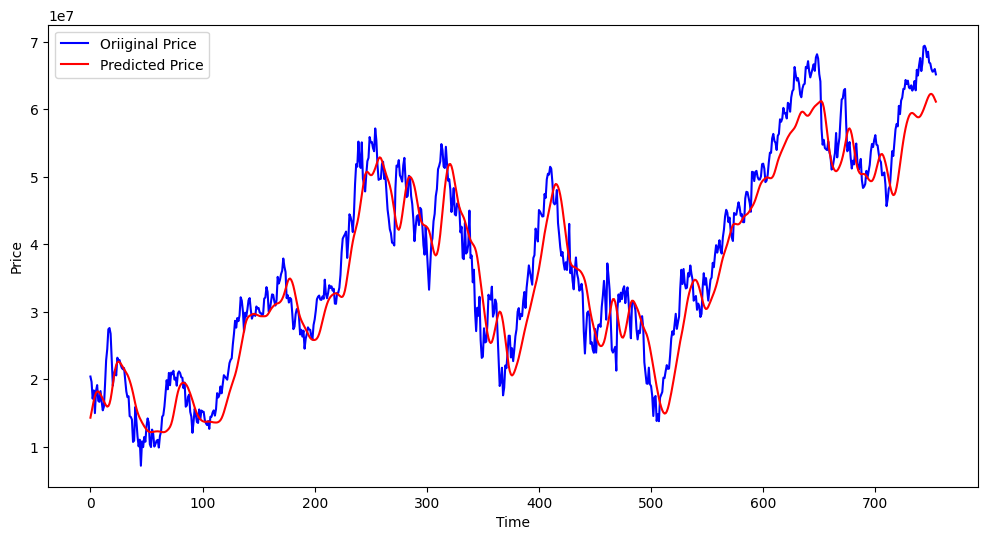

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Oriiginal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()